# AAM-IPL Week-1 Project - PCA - Ames Housing
**Reference Project Implementation** </br>
**Branch and Course of Study**: B.Tech (CSE - AI & ML) </br>
**Department**: CSM </br>
**Semester**: V </br>
**Email**: venkat.reddy.gf@gprec.ac.in </br>
**Guest Faculty and Instructor**: Venkateswar Reddy Melachervu </br>
**Program Coordinator**: Prof. V.Suresh </br>

**Project Objective**:</br>
Apply PCA for reducing the dimensionality of Ames Housing Project for efficient ML model.

**Dataset**: </br>
Ames Housing data set, Iowa

**AAM-IPL of GPREC is brought to you by Brillium Technologies.**

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.image as mpimg
from PIL import Image

In [2]:
# Config parameters
water_mark_text = 'GPREC AAM-IPL'
# GPREC AAM-IPL logo  watermark image
gprec_aam_ipl_logo = 'AAM-IPL Header-6.png'

# Load the dataset
data_path = 'ames.csv'
df = pd.read_csv(data_path, index_col=None)

# Check the column names to ensure 'Id' is there
df.reset_index(inplace=True)

# Get the column names as a list and print them
cleaned_columns = df.columns.tolist()

# Print the total number of columns
total_columns = df.shape[1]
print(f"Total number of columns in the Ames dataset: {total_columns}\n")
print(f"Columns/variables in Ames Data Set are:\n {cleaned_columns}\n")

# Print the total number of samples with meaningful text
total_samples = df.shape[0]
print(f"The total number of samples in the dataset is: {total_samples}\n")

# Display the first few rows of the dataset
# print("First few rows of the Ames dataset:")
# print(df.head())

# Identify numerical and categorical columns and print tthem
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns
print(f"Numerical columns:\n {list(numerical_cols)}\n")
print(f"Categorical columns:\n {list(categorical_cols)}\n")

# Identify numerical and categorical columns with missing values
numerical_cols_with_na = df[numerical_cols].columns[df[numerical_cols].isna().any()].tolist()
categorical_cols_with_na = df[categorical_cols].columns[df[categorical_cols].isna().any()].tolist()

# Print column names with missing values
print(f"Numerical columns with missing values: {numerical_cols_with_na}")
print(f"Categorical columns with missing values: {categorical_cols_with_na}\n")

# Handle missing values (you can adjust this step based on your preference)
print("Filling in the missing values for numeric and categorical columns...")
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())
df[categorical_cols] = df[categorical_cols].fillna('Missing')
print("Done - filling in the missing values for numeric and categorical columns with mean for numeric and missing for categorical.\n")

# Encode categorical features and scale numerical features
print("Scaling numeric feature, encoding categorical feature values and transforming the data...")
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ])
# Apply the transformations
X = preprocessor.fit_transform(df)
print("Done - scaling numeric feature, encoding categorical feature values and transforming the data.\n")

Total number of columns in the Ames dataset: 80

Columns/variables in Ames Data Set are:
 ['index', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'FirstFlrSF', 'SecondFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF

Calculating explained variance and plotting...


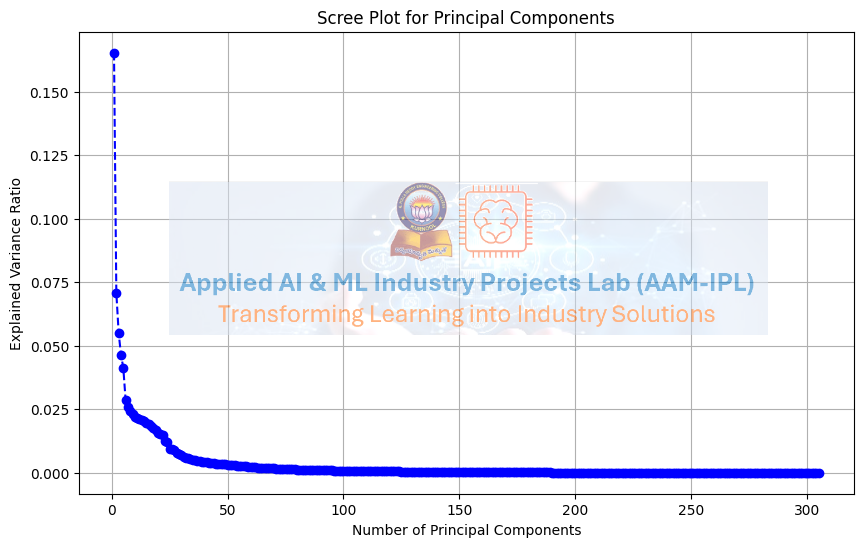

Done - calculating explained variance and plotting.
Calculating cumulative explained variance and plotting...


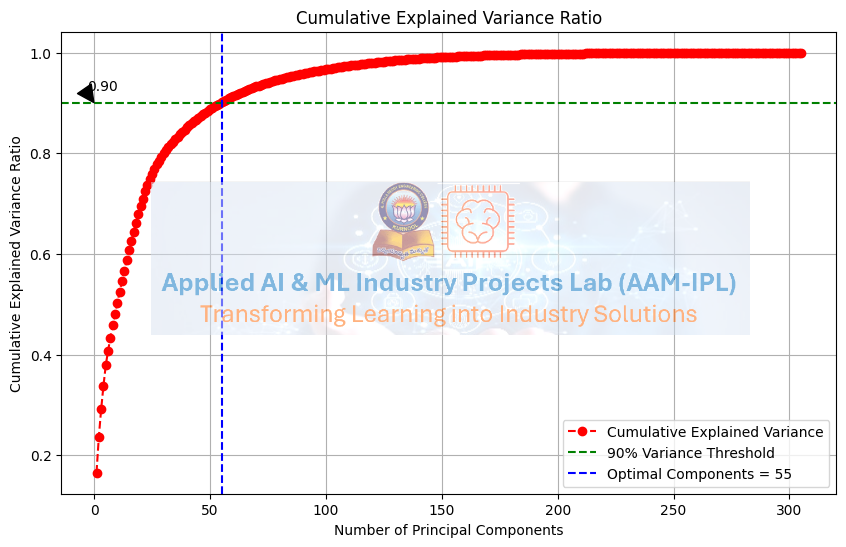

Done - calculating cumulative explained variance and plotting.



In [3]:
# Apply PCA without any dimensional reduction
pca = PCA()
X_pca = pca.fit_transform(X)

# Calculate explained variance ratio
print("Calculating explained variance and plotting...")
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
# Plot the explained variance ratio (Scree Plot)
logo_img = mpimg.imread(gprec_aam_ipl_logo)
# Create a scree plot with the logo as a watermark
fig, ax = plt.subplots(figsize=(10, 6))
# Plot the explained variance ratio (Scree Plot)
ax.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--', color='b', label='Individual Explained Variance')
ax.set_xlabel('Number of Principal Components')
ax.set_ylabel('Explained Variance Ratio')
ax.set_title('Scree Plot for Principal Components')
ax.grid()
# Add the logo as a watermark
imagebox = OffsetImage(logo_img, zoom=0.4, alpha=0.5)
ab = AnnotationBbox(imagebox, (0.5, 0.5), frameon=False, xycoords='axes fraction')
ax.add_artist(ab)
plt.show()
print("Done - calculating explained variance and plotting.")

# Plot cumulative explained variance to find the optimal number of components
print("Calculating cumulative explained variance and plotting...")
optimal_components = np.argmax(cumulative_explained_variance >= 0.90) + 1
fig, ax = plt.subplots(figsize=(10, 6))
# Plot cumulative explained variance
ax.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--', color='r', label='Cumulative Explained Variance')
ax.axhline(y=0.90, color='g', linestyle='--', label='90% Variance Threshold')  # Add label for the 90% variance line
ax.axvline(x=optimal_components, color='b', linestyle='--', label=f'Optimal Components = {optimal_components}')  # Add line for optimal components

# Annotate the 90% value on the Y-axis
ax.annotate('0.90', xy=(0, 0.90), xytext=(-3, 0.92), textcoords='data', color='black', fontsize=10,
            arrowprops=dict(facecolor='black', shrink=0.05), verticalalignment='bottom')

# Set labels and title
ax.set_xlabel('Number of Principal Components')
ax.set_ylabel('Cumulative Explained Variance Ratio')
ax.set_title('Cumulative Explained Variance Ratio')

# Show legend in the bottom right
ax.legend(loc='lower right')
# Add grid
ax.grid()

# Add the GPREC AAM-IPL logo as a watermark
imagebox = OffsetImage(logo_img, zoom=0.4, alpha=0.5)
ab = AnnotationBbox(imagebox, (0.5, 0.5), frameon=False, xycoords='axes fraction')
ax.add_artist(ab)
plt.show()
print("Done - calculating cumulative explained variance and plotting.\n")

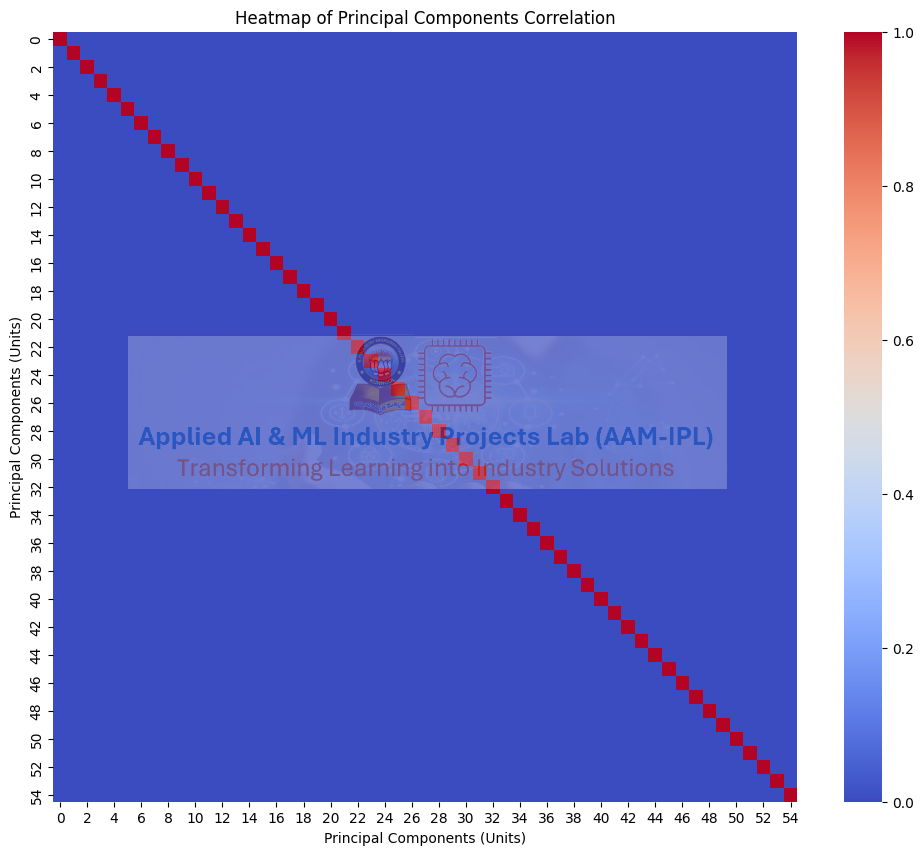

In [4]:
# Apply PCA with optimal number of components
pca_optimal = PCA(n_components=optimal_components)
X_pca_optimal = pca_optimal.fit_transform(X)

# Compute the correlation matrix of the principal components
corr_matrix = pd.DataFrame(X_pca_optimal).corr()

# Plot the heatmap with GPREC AAM-IPL logo watermark and updated alpha and axis units
fig, ax = plt.subplots(figsize=(12, 10))

# Plot heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, ax=ax)
ax.set_title('Heatmap of Principal Components Correlation')

# Set units for X and Y axes
ax.set_xlabel('Principal Components (Units)')
ax.set_ylabel('Principal Components (Units)')

# Add the GPREC AAM-IPL logo as a watermark with adjusted alpha
imagebox = OffsetImage(logo_img, zoom=0.4, alpha=0.3)
ab = AnnotationBbox(imagebox, (0.5, 0.5), frameon=False, xycoords='axes fraction')
ax.add_artist(ab)

plt.show()

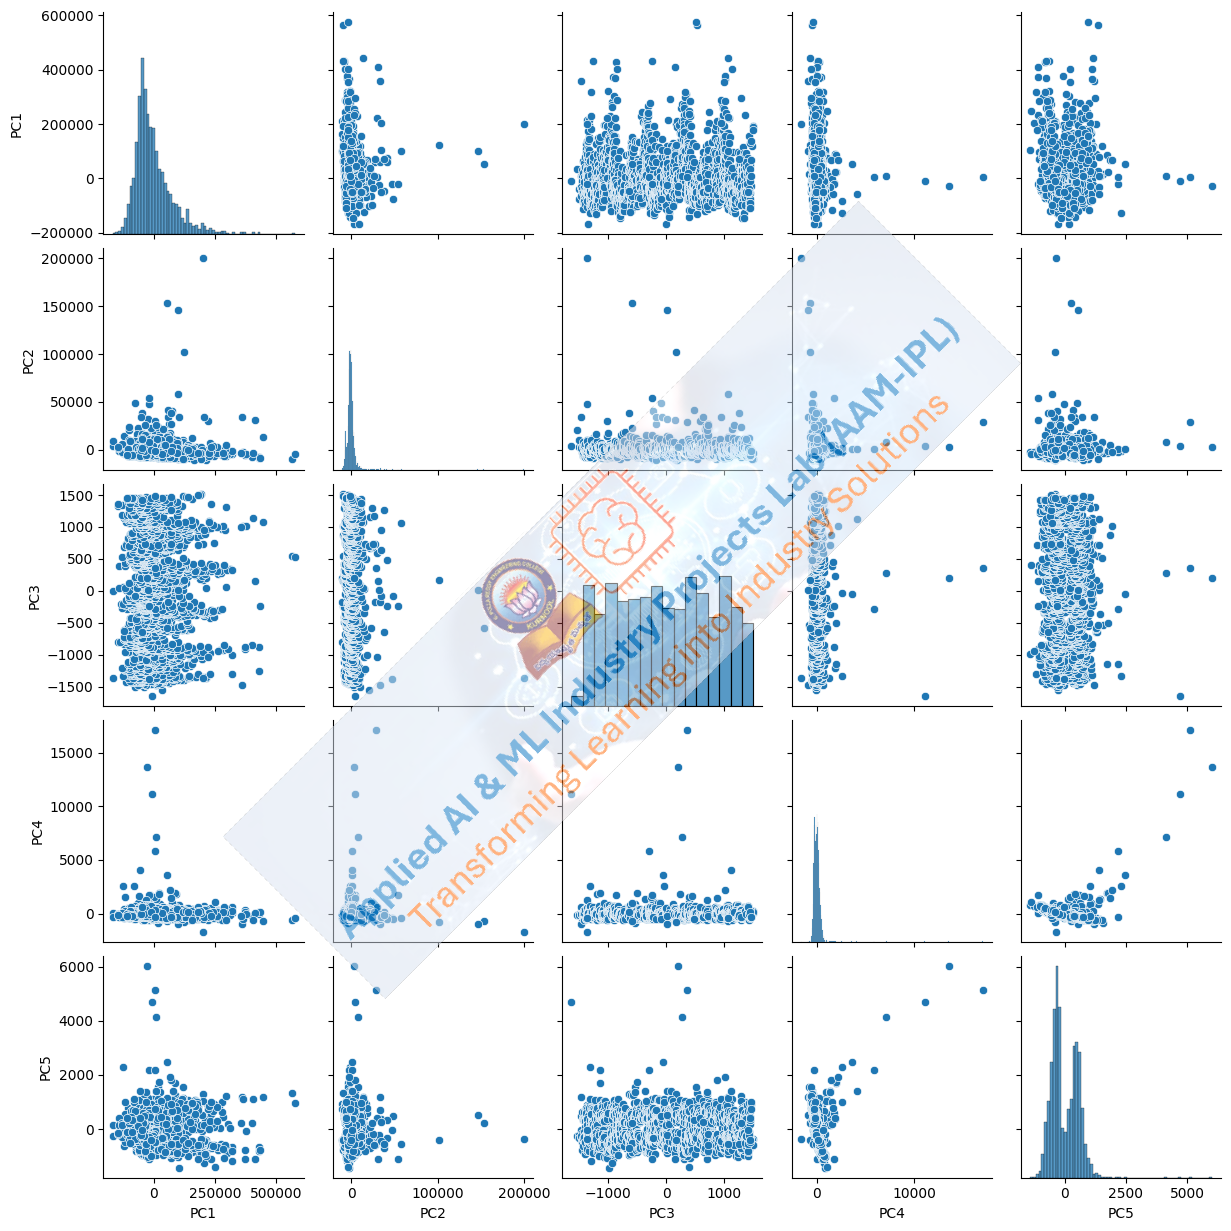

In [5]:
# Pair plot first 5 principal components

# Apply PCA to retain the first 5 principal components
pca_five = PCA(n_components=5)
X_pca_five = pca_five.fit_transform(df[numerical_cols])

# Convert the PCA-transformed data into a DataFrame for plotting
pca_df = pd.DataFrame(X_pca_five, columns=[f'PC{i}' for i in range(1, 6)])

# Load and rotate the GPREC logo image using PIL
logo_image = Image.open(gprec_aam_ipl_logo)
rotated_logo = logo_image.rotate(45, expand=True)

# Convert the rotated image back to an array for embedding
rotated_logo_img = np.array(rotated_logo)

# Plot pairplot for the first 5 principal components
sns.pairplot(pca_df)

# Add rotated GPREC AAM-IPL logo watermark to the plot
plt.gcf()  # Get current figure
imagebox = OffsetImage(rotated_logo_img, zoom=0.6, alpha=0.5)
ab = AnnotationBbox(imagebox, (0.5, 0.5), frameon=False, xycoords='figure fraction')
plt.gca().add_artist(ab)

plt.show()


In [6]:
# Generate the PDF of code and output of project jupyter file
!jupyter nbconvert --to pdf AAM-IPL-Wk-1-PCA-Ames-Housing_v2.ipynb

[NbConvertApp] Converting notebook AAM-IPL-Wk-1-PCA-Ames-Housing_v2.ipynb to pdf
[NbConvertApp] Support files will be in AAM-IPL-Wk-1-PCA-Ames-Housing_v2_files\
[NbConvertApp] Making directory .\AAM-IPL-Wk-1-PCA-Ames-Housing_v2_files
[NbConvertApp] Writing 47950 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | b had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 871884 bytes to AAM-IPL-Wk-1-PCA-Ames-Housing_v2.pdf
